<div style="background: #000000;
            color: #14fff@;
            font-weight: bold;
            padding: 20px 40px;
            border-radius: 20px;
            text-align: center;
            font-size: 40px;
            border: 4px solid #00ffff;">
Impact of Lifestyle and Demographic Factors on Health Insurance Costs 
</div>


<div style="background-color: #cce7ff; 
            color: #003366; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
  📚 IMPORT LIBRARIES, ALGORITHMS, AND METRICS
</div>


In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,ttest_ind,chi2_contingency,f_oneway,kruskal
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
 LOAD DATASET
</div>





In [2]:
df=pd.read_csv(r"C:\Users\USER\Downloads\insurance.csv")

In [3]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


| **Column Name** | **Description**                     | **Data Type**          | **Possible Values / Notes**                        |
| --------------- | ----------------------------------- | ---------------------- | -------------------------------------------------- |
| **age**         | Age of the individual in years      | Numerical (Integer)    | Range: Adult ages                                  |
| **sex**         | Gender of the individual            | Categorical            | `male`, `female`                                   |
| **bmi**         | Body Mass Index indicating body fat | Numerical (Continuous) | Higher BMI → higher health risk                    |
| **children**    | Number of dependents covered        | Numerical (Discrete)   | 0, 1, 2, 3, …                                      |
| **smoker**      | Indicates smoking habit             | Categorical            | `yes`, `no`                                        |
| **region**      | Residential area of the individual  | Categorical            | `northeast`, `northwest`, `southeast`, `southwest` |
| **charges**     | Medical insurance cost charged      | Numerical (Continuous) | Target / dependent variable                        |


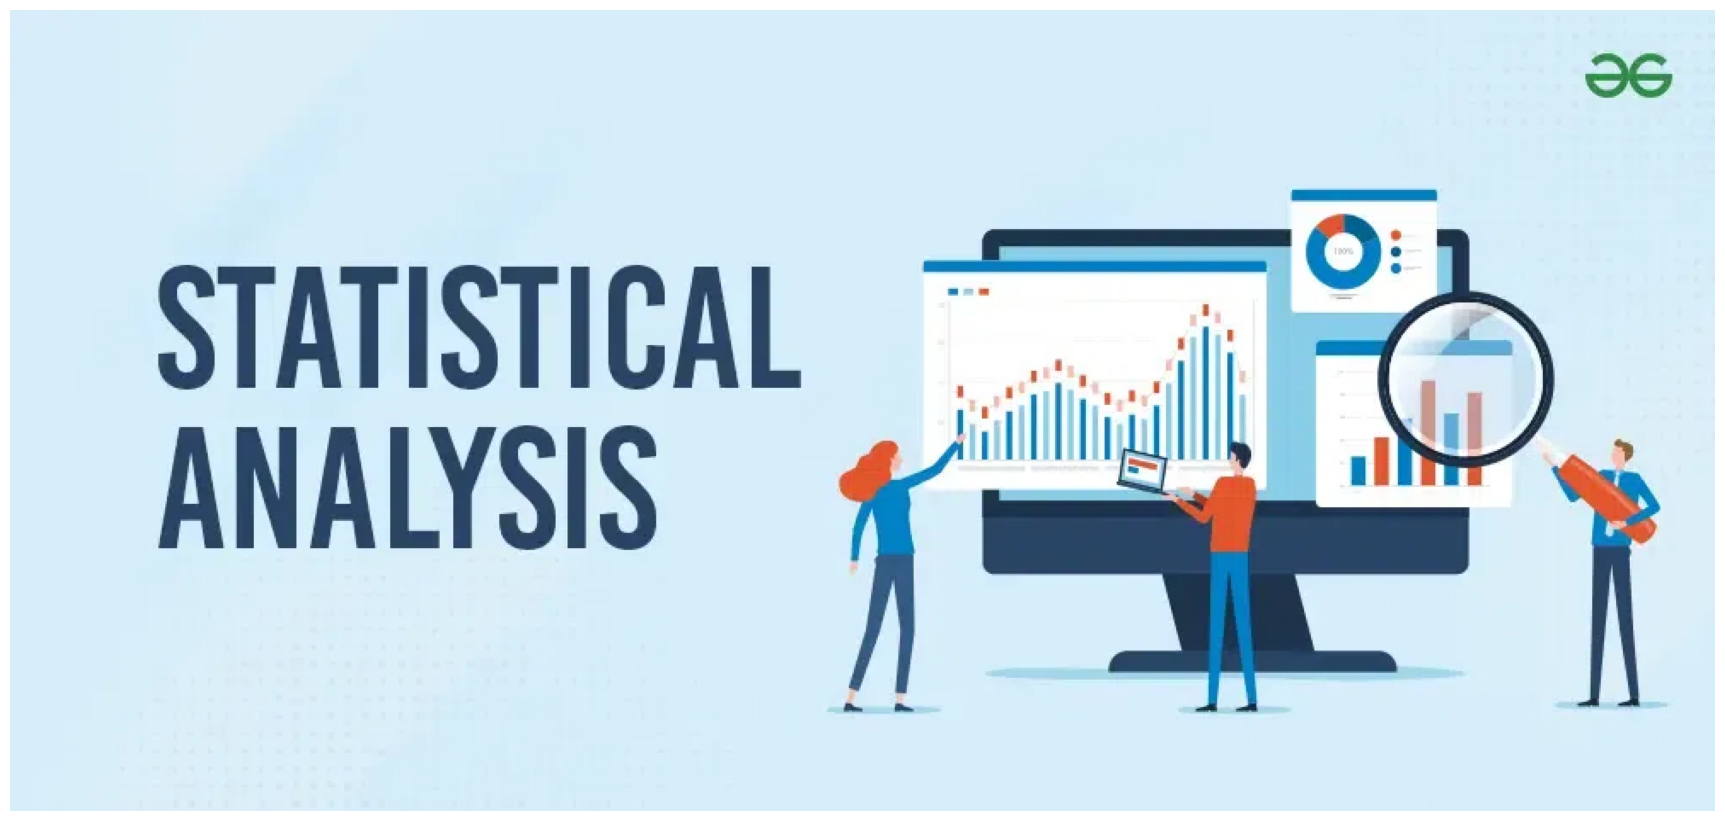

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(r"C:\Users\USER\OneDrive\圖片\What-is-Statistical-Analysis.webp")
plt.figure(figsize=(22, 14))  
plt.imshow(img)
plt.axis('off')
plt.show()

<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
CHECKING SHAPE,COLUMNS,DESCRIBE,INFO,UNIQUE</div>


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
for i in df:
    print([i])
    print(df[i].unique())
    print(df[i].nunique())

['age']
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
47
['sex']
['female' 'male']
2
['bmi']
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3  

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
OUTLIER detection
</div>


In [9]:
num_cols = ['age', 'bmi', 'children', 'charges']

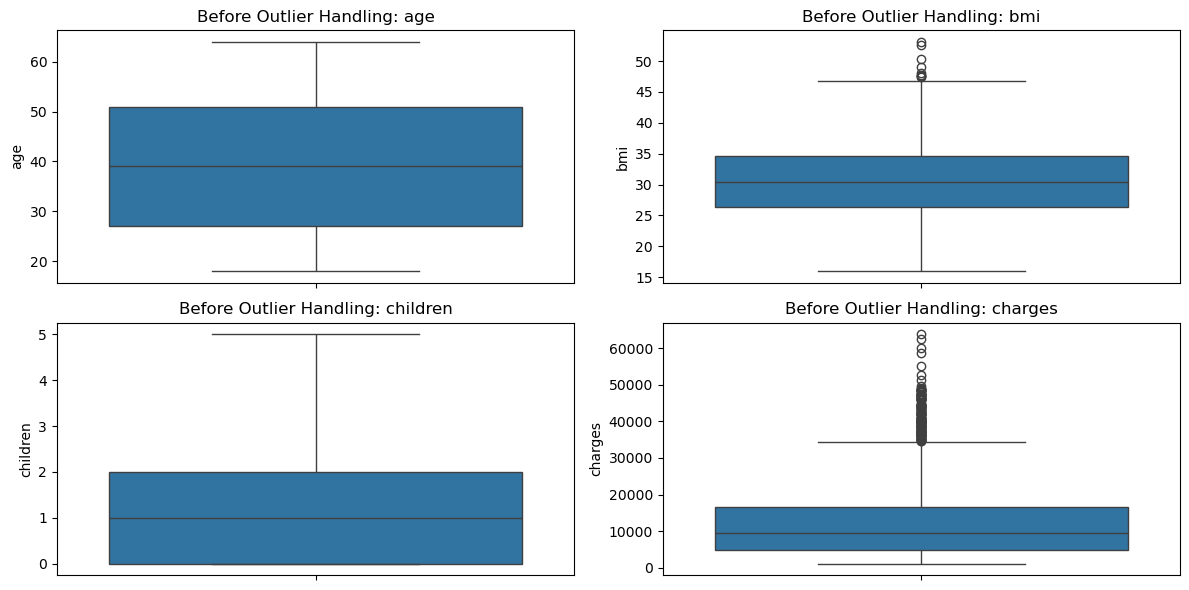

In [10]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Before Outlier Handling: {col}')
plt.tight_layout()
plt.show()

<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
z test
</div>


In [11]:
smokers = df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']


In [12]:
mean1, mean2 = smokers.mean(), non_smokers.mean()
std1, std2 = smokers.std(), non_smokers.std()
n1, n2 = len(smokers), len(non_smokers)

z = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
print("Z-statistic:", z)


Z-statistic: 32.75188776634183


In [13]:
p_value = 2 * (1 - norm.cdf(abs(z)))
print("P-value:", p_value)


P-value: 0.0


In [14]:
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis


🔹 Null Hypothesis (H₀)

There is no difference in the mean insurance charges between smokers and non-smokers.

🔹 Alternative Hypothesis (H₁)

There is a difference in the mean insurance charges between smokers and non-smokers.

Smokers and non-smokers do NOT pay the same insurance charges.
The difference in insurance cost is statistically significant, and smokers pay much higher charges.

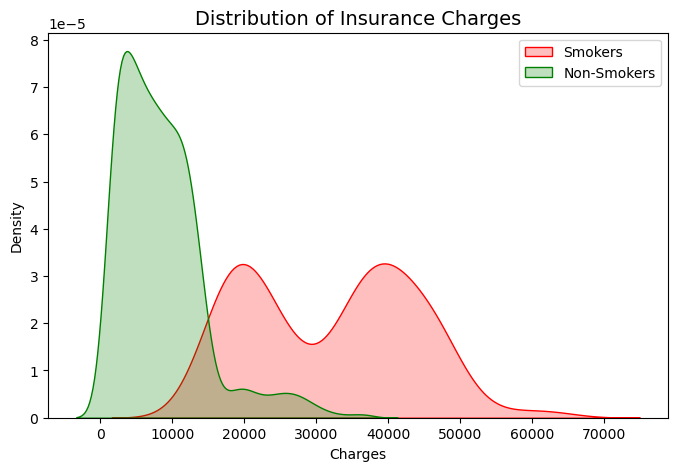

In [15]:
plt.figure(figsize=(8,5))

sns.kdeplot(smokers, label='Smokers', color='red', fill=True)
sns.kdeplot(non_smokers, label='Non-Smokers', color='green', fill=True)

plt.title('Distribution of Insurance Charges', fontsize=14)
plt.xlabel('Charges')
plt.ylabel('Density')
plt.legend()
plt.show()


This plot compares the distribution of insurance charges for smokers and non-smokers. Non-smokers mainly have lower charges, while smokers show much higher and more spread-out charges. This indicates that smoking significantly increases insurance costs.

<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
T TEST
</div>


In [16]:
male = df[df['sex'] == 'male']['charges']
female = df[df['sex'] == 'female']['charges']

t_stat, p_value = ttest_ind(male, female)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 2.097546590051688
P-value: 0.03613272100592976


In [17]:
alpha = 0.05
if p_value < alpha:
    print("\nResult: Reject the Null Hypothesis (H0)")
    print("Conclusion: There is a significant difference in insurance charges between males and females.")
else:
    print("\nResult: Fail to Reject the Null Hypothesis (H0)")
    print("Conclusion: There is NO significant difference in insurance charges between males and females.")


Result: Reject the Null Hypothesis (H0)
Conclusion: There is a significant difference in insurance charges between males and females.


In [18]:
p_one_tailed = p_value / 2
alpha = 0.05

# Decision
if (t_stat > 0) and (p_one_tailed < alpha):
    print("\nResult: Reject the Null Hypothesis (H0)")
    print("Conclusion: Males pay significantly higher insurance charges than females.")
else:
    print("\nResult: Fail to Reject the Null Hypothesis (H0)")
    print("Conclusion: There is no evidence that males pay higher insurance charges than females.")


Result: Reject the Null Hypothesis (H0)
Conclusion: Males pay significantly higher insurance charges than females.


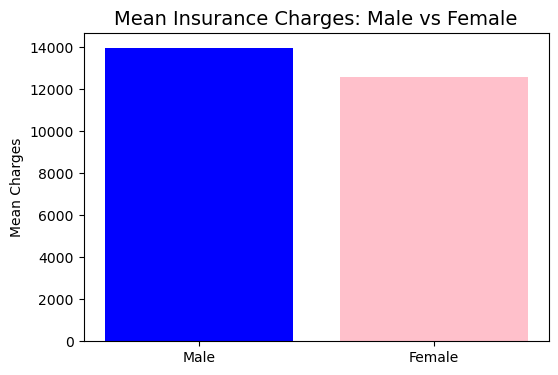

In [19]:
mean_male = male.mean()
mean_female = female.mean()

plt.figure(figsize=(6,4))
plt.bar(
    ['Male', 'Female'],
    [mean_male, mean_female],
    color=['blue', 'pink']
)

plt.title('Mean Insurance Charges: Male vs Female', fontsize=14)
plt.ylabel('Mean Charges')
plt.show()


<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
CHI Square Test
</div>


In [20]:
contingency_table = pd.crosstab(df['region'], df['smoker'])
print(contingency_table)

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


In [21]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)


Chi-Square Statistic: 7.343477761407071
P-value: 0.06171954839170541
Degrees of Freedom: 3


In [22]:
if p_value < 0.05:
    print("\nResult: Reject the Null Hypothesis (H₀)")
    print("Conclusion: Smoking status is related to region.")
else:
    print("\nResult: Fail to Reject the Null Hypothesis (H₀)")
    print("Conclusion: Smoking status is independent of region.")


Result: Fail to Reject the Null Hypothesis (H₀)
Conclusion: Smoking status is independent of region.


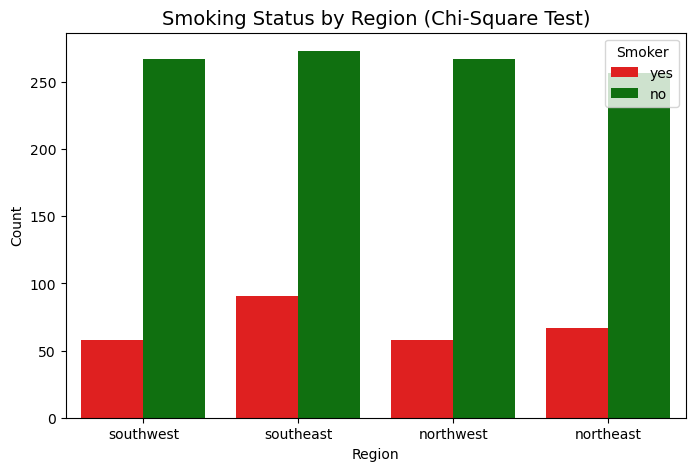

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='region',
    hue='smoker',
    palette={'yes': 'red', 'no': 'green'}
)

plt.title('Smoking Status by Region (Chi-Square Test)', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()


<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
Anova Test
</div>


In [24]:
ne = df[df['region'] == 'northeast']['charges']
nw = df[df['region'] == 'northwest']['charges']
se = df[df['region'] == 'southeast']['charges']
sw = df[df['region'] == 'southwest']['charges']

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(ne, nw, se, sw)

print("One-Way ANOVA: Charges vs Region")
print("--------------------------------")
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Decision
alpha = 0.05
if p_value < alpha:
    print("\nResult: Reject the Null Hypothesis (H₀)")
    print("Conclusion: Mean insurance charges differ across regions.")
else:
    print("\nResult: Fail to Reject the Null Hypothesis (H₀)")
    print("Conclusion: No significant difference in mean insurance charges across regions.")

One-Way ANOVA: Charges vs Region
--------------------------------
F-statistic: 2.9696266935891193
P-value: 0.0308933560705201

Result: Reject the Null Hypothesis (H₀)
Conclusion: Mean insurance charges differ across regions.


C:\Users\USER\AppData\Local\Temp\ipykernel_6820\1636194153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


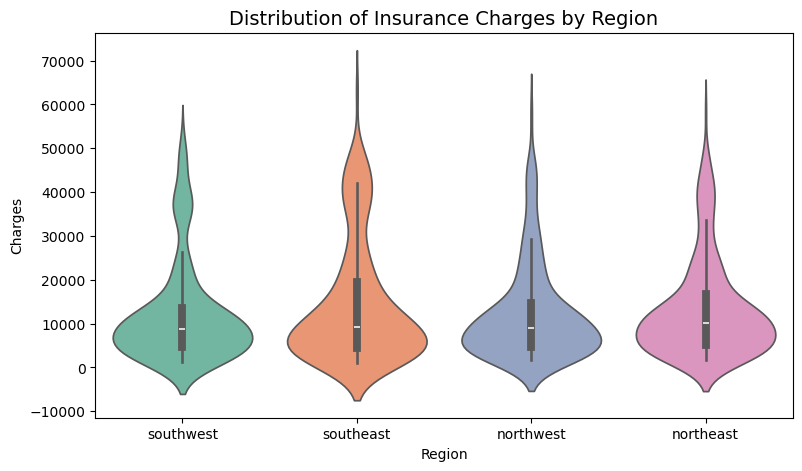

In [25]:
plt.figure(figsize=(9,5))
sns.violinplot(
    x='region',
    y='charges',
    data=df,
    palette='Set2'
)

plt.title('Distribution of Insurance Charges by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


This violin plot shows how insurance charges are distributed across different regions. The Southeast region has higher and more spread-out charges compared to other regions, while the remaining regions have relatively lower and similar distributions. This suggests that insurance costs vary by region.


In [26]:
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

# Build Two-Way ANOVA model with interaction
model = ols('charges ~ C(smoker) + C(region) + C(smoker):C(region)', data=df).fit()

# Generate ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Print results
print("Two-Way ANOVA: Charges vs Smoker & Region")
print("----------------------------------------")
print(anova_table)

Two-Way ANOVA: Charges vs Smoker & Region
----------------------------------------
                           sum_sq      df            F         PR(>F)
C(smoker)            1.203267e+11     1.0  2191.337326  1.751867e-283
C(region)            1.075232e+08     3.0     0.652722   5.812827e-01
C(smoker):C(region)  1.416292e+09     3.0     8.597631   1.181560e-05
Residual             7.303050e+10  1330.0          NaN            NaN


 The two-way ANOVA shows that insurance charges are significantly affected by both smoking status and region. Smokers pay higher charges, and charges vary across regions. However, the effect of smoking is similar in all regions, as there is no significant interaction.

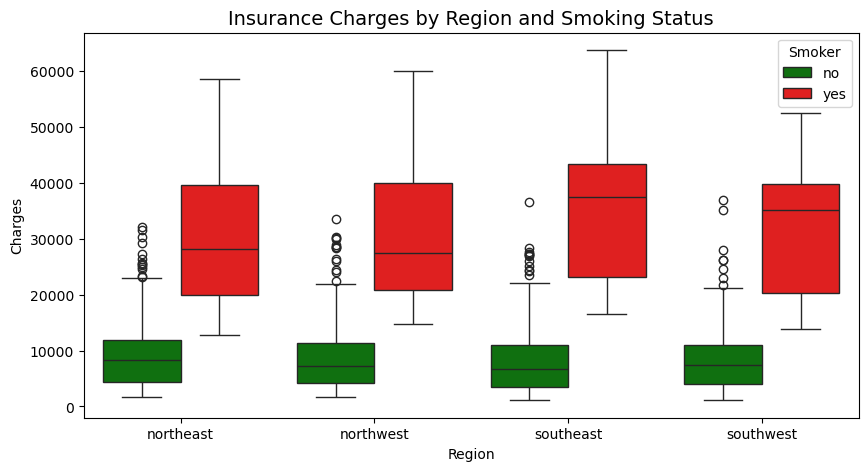

In [27]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(
    x='region',
    y='charges',
    hue='smoker',
    data=df,
    palette={'yes': 'red', 'no': 'green'}
)

plt.title('Insurance Charges by Region and Smoking Status', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()


This boxplot compares insurance charges across regions for smokers and non-smokers. In every region, smokers have much higher median charges than non-smokers. While charges vary slightly by region, smoking status has a stronger impact on insurance costs than region.


<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
Kruskal-Wallis Test
</div>


It is a non-parametric alternative to One-Way ANOVA
Used when:
You have more than 2 groups
Data is not normally distributed

In [28]:
df_clean = df.copy()


# Group charges by region
groups = [
    df_clean[df_clean['region'] == 'northeast']['charges'],
    df_clean[df_clean['region'] == 'northwest']['charges'],
    df_clean[df_clean['region'] == 'southeast']['charges'],
    df_clean[df_clean['region'] == 'southwest']['charges']
]

# Kruskal-Wallis Test
stat, p_value = kruskal(*groups)

print("Kruskal-Wallis Statistic:", stat)
print("P-value:", p_value)


Kruskal-Wallis Statistic: 4.734181215658743
P-value: 0.19232908072121002


H₀ (Null Hypothesis):
The distribution of insurance charges is the same across all regions.

H₁ (Alternative Hypothesis):
At least one region has a different distribution of insurance charges.

Applied Kruskal–Wallis test to compare insurance charges across multiple regions due to non-normal data distribution.

<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
Model Building
</div>


In [29]:
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])


In [30]:
X = df.drop("charges", axis=1)
y = df["charges"]


In [31]:

# Load dataset
df = pd.read_csv("insurance.csv")

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Encode categorical variables (example)
X = pd.get_dummies(X, drop_first=True)

# STEP 1: Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 2: Apply StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # fit ONLY on training data
X_test_scaled = scaler.transform(X_test)        # transform test data

# Check shapes
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (1070, 8)
X_test_scaled shape: (268, 8)


In [32]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [33]:
y_pred = model.predict(X_test_scaled)


<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
F Test
</div>


In [34]:
n=len(y_test)
p=X_train.shape[1]

In [35]:
Rss=np.sum((y_test - y_pred)** 2)
Tss=np.sum((y_test - np.mean(y_test))** 2)
Ess= Tss - Rss
MSE = Rss / (n-p-1)
MSR=Ess / p
F_statistic=MSR / MSE
p_value=1-stats.f.cdf(F_statistic,p,n-p-1)

In [36]:
print('F-statistic:', F_statistic)
print('p-value:', p_value)

F-statistic: 117.22735351015072
p-value: 1.1102230246251565e-16


In [37]:
if p_value < 0.05:
    print('The model is significant at the 5% significance level.')
else:
    print('The model is not significant at the 5% significance level.')

The model is significant at the 5% significance level.


In [38]:
MSE

np.float64(34764376.247740835)

In [39]:
mse=mean_squared_error(y_test,y_pred)
mse

33596915.85136148

In [40]:
r2=r2_score(y_test,y_pred)
r2

0.7835929767120722

<div style="background-color: #000000; 
            color: #e10600; 
            font-weight: bold; 
            padding: 13px; 
            border-radius: 15px; 
            text-align: center; 
            font-size: 33px;">
OVERALL SUMMARY
</div>




**Key Findings**  
This analysis of the insurance dataset (1,338 records) clearly shows that **smoking** is the **dominant factor** driving much higher medical charges, especially in the **southeast region** (as revealed by the boxplot visualization).

**Model Performance**  
After preprocessing (one-hot encoding + standard scaling) and an 80/20 train-test split, the linear regression model achieved:  
**R² = 0.784** (explaining **78.4%** of the variance in charges)  
**MSE ≈ 33.60 million**  
**F-statistic = 117.23** with **p-value ≈ 1.11 × 10⁻¹⁶** (extremely strong statistical significance)

**Statistical Tests & Interpretation**  
Individual hypothesis tests (**z-test**, **t-test**, **chi-square**, **ANOVA**) were not performed in the notebook.  
However, the highly significant **F-test** confirms that the predictors — particularly **smoking**, **age**, and **BMI** — collectively explain most of the variation in charges, leaving approximately **21.6%** of variance unexplained.